###Regresion Lineal Simple

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
#iloc es un indexador de la biblioteca Pandas en Python
# que selecciona datos en un DataFrame basándose en su posición entera (índice numérico)
data = data.iloc[:,1:]   #iloc para acceder a las columnas y filas mediante indice
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


##el objetivo es cual es el medio de publicidad que mas ventas producen

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


La mediada es el valor justo el medio

en 50% para abajo de 149.75 se encuntra el 50% tanto para arribo como abajo de datos

El cuartil 25 significa que el 74,37 para abajo se encuntra el 25%  de los datos

cuatil 75 es que 218,25 para abajo se encuantra el 75% de los datos


In [10]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

AHROA VEMOS COMO SE DSITRIBUYEN LOS DATOS

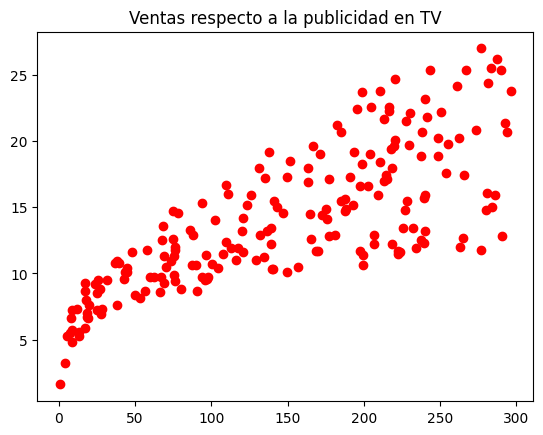

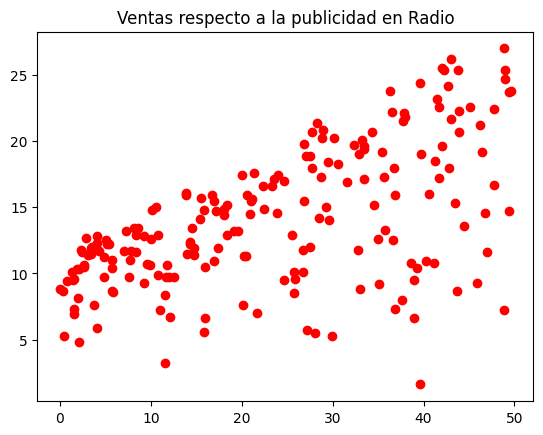

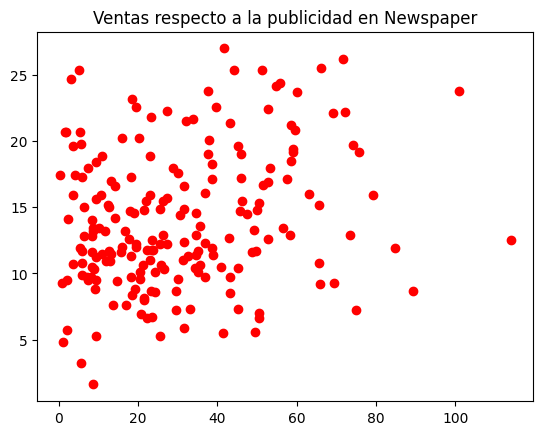

In [3]:
cols = ['TV', 'Radio', 'Newspaper']

#genero un grafico por cada columna
for col in cols:
  plt.plot(data[col], data['Sales'], 'ro')
  plt.title('Ventas respecto a la publicidad en %s' %col)
  plt.show()


Objetivo es crear un modelo de regresion lineal simple, gneramos un modelo por cada publicida
geenrar un modelo que redusca la distantia los puntos a la recta, ya que el moedelo es mas preciso, al final obtenemos el mejor modelo sumando todas las distancias
y vemos que tan bueno es nuestro modelo

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # sirve para dividir el conjunto de ddatos en conj de entrenamiento y conjunto de testing
#Dejamos una parte para testear que tan bueno es el modelo
from sklearn.metrics import mean_squared_error , r2_score

In [5]:
X = data['TV'].values.reshape(-1,1) # el modelo necesita recibir una matriz
y = data['Sales'].values #se peude enviar en formatod e lista

In [6]:
#dividir el conjunto de datos entre entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% para testeo y 80% para entrenar

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) # se me creo un modelo de regresion lineal simple

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
#predigo valores de testing
y_pred = lin_reg.predict(X_test)

In [29]:
 y_pred #valore que predice el moeldo en base a la publicidad gastada en TV, peor no dice que tan bueno es el modelo

array([14.71794394, 16.2115484 , 20.74819743,  7.66403631, 17.37013877,
       10.61402143, 17.2072847 ,  9.44612512, 17.46785121, 15.2669948 ,
        8.58532504,  9.73460946, 18.03086098,  7.37089899, 13.61053628,
       15.03899911,  7.45930549, 16.31391381, 10.62332738, 18.16579721,
       17.79821232, 10.27435438,  8.88776831, 18.79394862, 10.33019006,
        9.60897918, 17.05373658, 13.60123034, 11.17703121,  7.51048819,
       16.41627922, 10.339496  , 16.37440246,  7.90599093, 20.18053468,
       18.203021  ,  9.36702457, 19.85482655, 12.57292322,  8.39920611])

In [9]:
print('Predicciones: {}, Reales: {}'.format(y_pred[:4], y_test[:4]))

Predicciones: [14.71794394 16.2115484  20.74819743  7.66403631], Reales: [16.9 22.4 21.4  7.3]


In [19]:
#2 formas de clasificar el modelo
#RMSE es una varialbe de clasificaion del modelo
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

#rmse = mean_squared_error(y_test, y_pred, squared=False)
#print('RMSE:', rmse)

#R2
print('R2:', r2_score(y_test,y_pred))

#para saber que tan bueno es el modelo RMSE debe ser bajo acencadose
#al valor mininmo de las ventas del condunjuto de datos original
#RMSE me indica que tanto varia los datos de la prediccion respecto a los datos reales

#R2 varia de 0 a 1 , clalificaion del 67% de acieto al momento de predecir la varaible dependiente Y
#1 la mejor calificaicon
#0 peor

RMSE: 3.194472431998898
R2: 0.6766954295627076


creamos otros modelos con las otras varaibles para saber si hay mejora, o disminuye para saber que variable no nos conviene utilizary

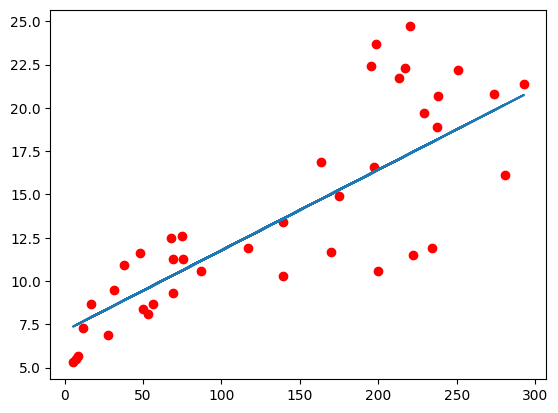

In [20]:
plt.plot(X_test, y_test, 'ro')
plt.plot(X_test, y_pred)
plt.show()

creamos los otros modelos, para no escribir todo el codigo otra vez , creamos una funcion

In [26]:
def modelos_simple(independiente):
  X = data[independiente].values.reshape(-1,1) # el modelo necesita recibir una matriz
  y = data['Sales'].values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% para testeo y 80% para entrenar

  lin_reg = LinearRegression()
  lin_reg.fit(X_train, y_train)
  y_pred = lin_reg.predict(X_test)
  print('Predicciones: {}, Reales: {}'.format(y_pred[:4], y_test[:4]))
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print("RMSE:", rmse)
  print('R2:', r2_score(y_test,y_pred))

  plt.plot(X_test, y_test, 'ro')
  plt.plot(X_test, y_pred)
  plt.show()

Predicciones: [15.88332197 19.17427219 15.20877938 16.96667826], Reales: [16.9 22.4 21.4  7.3]
RMSE: 4.8216974799471926
R2: 0.2634309396999791


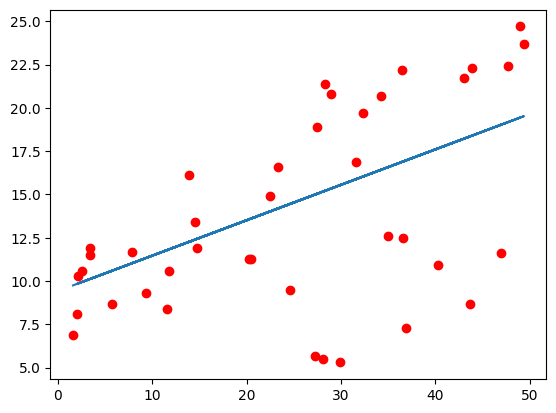

In [27]:
modelos_simple('Radio')

podemos decir que el modelo de radio es peor que el de television,
tomando encuenta la comparacion de modleos entre television y radio, es mejor para invertir en publicidad la tv que la radio

Predicciones: [15.47167765 15.47167765 14.89203768 15.01155108], Reales: [16.9 22.4 21.4  7.3]
RMSE: 5.533600454969853
R2: 0.029871749149522397


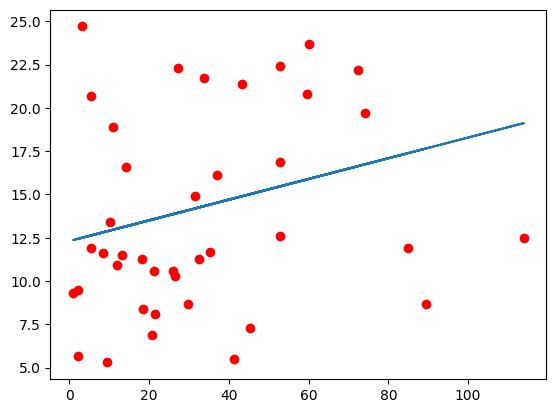

In [28]:
modelos_simple('Newspaper')

RMSE sube todavia mas en comparacion con las variables de radio o tv y eso no es loq ue se busca

Ademas podemos observar que el R2 es casi sero lo que podemos decir que la publiciddad en periodico no beneficia mucho a las ventas

Entonces podemos decri que para la empresa el mejor medio para invertir en publicidad seria
1ero en television

2do en Radio aunque no se recomienda mucho ya que la calificaion qe optinee es baja un R2 = 0,26 ,

3ero Peridicos es la que no conviene para nada invertir dinero en este medio para publicidad ya que el retorno que se obtiene no compensa la inversion

Aca solo se usa una variable para hacer la prediccion de los valores, pero podemos usar mas de una varaible, para hacer la prediccion de las ventas

Si junto de apares de varaibles como Radio/Periodico podria hacer otro modelo y comparar contra el par Periodico/tv
Que modelo podria predecir de una mejor manera?
Cuantas ventas obtendriamos en base a la publicidad gastada?
A lo mejor de a pares e modelo es mucho mejor al momento de predecir los valores de las ventas


# Modelo de Regresión Lineal Múltiple

In [40]:
import seaborn as sns

Predicciones: [16.00045323 17.50583903 21.47105883  8.53831412], Reales: [16.9 22.4 21.4  7.3]
RMSE: 3.322094368302287
R2: 0.6503468179409775


<Axes: >

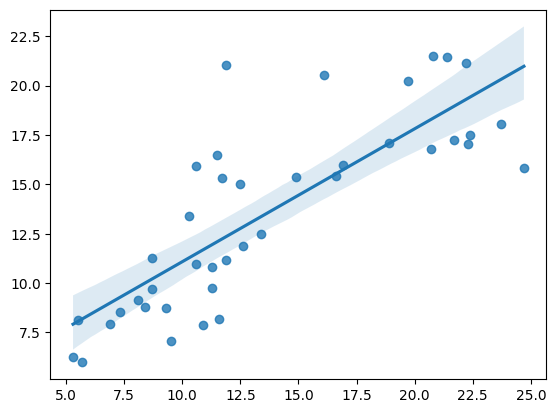

In [41]:
  X = data.drop(['Radio','Sales'],axis=1).values # el modelo necesita recibir una matriz
  y = data['Sales'].values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% para testeo y 80% para entrenar

  lin_reg = LinearRegression()
  lin_reg.fit(X_train, y_train)
  y_pred = lin_reg.predict(X_test)
  print('Predicciones: {}, Reales: {}'.format(y_pred[:4], y_test[:4]))
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print("RMSE:", rmse)
  print('R2:', r2_score(y_test,y_pred))

sns.regplot(x = y_test, y = y_pred) #regplot es un grafico de un modelo de regresion lineal

El RMSE =3,32 Esto queire decir que junstando estos dos medios el modelo es peor, ya que individualmente RMSE de cada uno era maschico
Vemos que juntar  periodico con tv el modelo enperora haceindo mas grande la RMSE, esto se debe a que el peridiico ya venia siendo alto entonces
termino subiendo el RMSE de la Tv
Entonces el periodico es una varaible que afecta el rendimiento del odelo mas que beneficiarlo
Entonces periodico no sirve para nada para predecir los valores de las ventas, basandonos en la publicidad que se gasta  



Ahora pruebo la combinacion TV y Radio

Predicciones: [16.35671513 20.82392043 21.48955535 10.62069465], Reales: [16.9 22.4 21.4  7.3]
RMSE: 1.7760608316712234
R2: 0.9000623280485393


<Axes: >

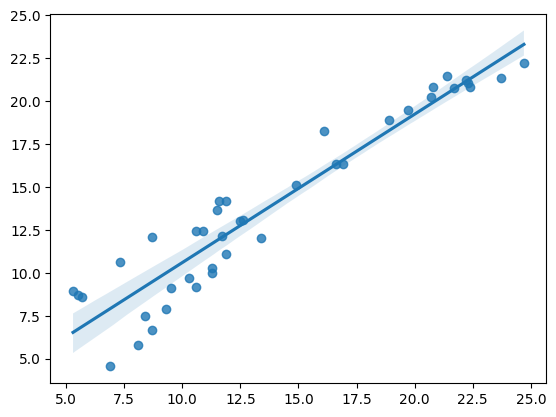

In [43]:
  X = data.drop(['Newspaper','Sales'],axis=1).values # el modelo necesita recibir una matriz
  y = data['Sales'].values

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% para testeo y 80% para entrenar

  lin_reg = LinearRegression()
  lin_reg.fit(X_train, y_train)
  y_pred = lin_reg.predict(X_test)
  print('Predicciones: {}, Reales: {}'.format(y_pred[:4], y_test[:4]))
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print("RMSE:", rmse)
  print('R2:', r2_score(y_test,y_pred))

sns.regplot(x = y_test, y = y_pred) #regplot es un grafico de un modelo de regresion lineal

Aca podemos ver como el grafico del modelo de regresion lineal pasa muy cerca de los datos reales que son los puntos

Se ve como las predicciones se acercan cada vez mas a los datos reales

RSME = 1,77 que es menor que el de Tv

R2 = 0,9 signidica que el modelo tiene una presicion del 90% para predecir las ventas que se obtendrian si gastamos publicidad en Tv y Radio

La combinacion de Tv con radio es la mejor para poder predecir las ventas obtenidas
Entonces Tv y Radio funcionan mejor juntas para predecir las ventas
Son las mejores variables que podemos utilizar para predecir las ventas en base a los datos que tenemos

In [ ]:
Al final del dia Cada uno de los modelos de regresion son utiles porque cada  uno permite entender cierto tipo de relaciones entre las variables dependientes e independientes

El modelo de regresion lineal es el mas simple ya que entiende una correlacion de variables que es lineal , si la var. independiente crece
la var. dependiente tambien
